In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Set up CLASS with desired cosmological parameters
cosmo = Class()
cosmo.set({
    'output': 'tCl,mTk',                  # temperature Cls and transfer functions
    'l_max_scalars': 500,
    'k_output_values': '0.001,0.01,0.1,0.5,1.0',
    'P_k_max_1/Mpc': 5.0,
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'h': 0.674,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054
    #'transfer_sources': 'theta',          # to get T0, T1, ISW, etc.
})
cosmo.compute()

# Get transfer functions at z ≈ 1100 (last scattering)
transfers = cosmo.get_transfer(z=1100)
ell = transfers['q']
T_SW = np.array(transfers['t0'])          # Sachs-Wolfe term (monopole)
T_Doppler = np.array(transfers['t1'])     # Doppler term (dipole)

# Approximate Dl = ℓ(ℓ+1)|T|²/2π (arbitrary normalization, not full Cl)
Dl_SW = ell * (ell + 1) * np.abs(T_SW)**2 / (2 * np.pi)
Dl_Doppler = ell * (ell + 1) * np.abs(T_Doppler)**2 / (2 * np.pi)
Dl_combined = ell * (ell + 1) * np.abs(T_SW + T_Doppler)**2 / (2 * np.pi)

# Plot the components
plt.figure(figsize=(10, 6))
plt.plot(ell, Dl_SW, label='Sachs-Wolfe (monopole)', linestyle='--', color='gray')
plt.plot(ell, Dl_Doppler, label='Doppler (dipole)', linestyle=':', color='black')
plt.plot(ell, Dl_combined, label='SW + Doppler', linestyle='-', color='darkblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)|T(\ell)|^2/2\pi$ [arb. units]')
plt.title('Sachs-Wolfe and Doppler Contributions to CMB')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.savefig("SW_Doppler_CLASS.png", dpi=300)
plt.show()

# Cleanup
cosmo.struct_cleanup()
cosmo.empty()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Set up CLASS with desired cosmological parameters
cosmo = Class()
cosmo.set({
    'output': 'tCl,mTk',                  # temperature Cls and transfer functions
    'l_max_scalars': 500,
    'k_output_values': '0.001,0.01,0.1,0.5,1.0',
    'P_k_max_1/Mpc': 5.0,
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'h': 0.674,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054
    #'transfer_sources': 'theta',          # to get T0, T1, ISW, etc.
})
cosmo.compute()
transfers = cosmo.get_transfer(z=1100)
print(transfers.keys())


In [ ]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

cosmo = Class()
cosmo.set({
    'output': 'tCl,mTk',
    'l_max_scalars': 300,
    'P_k_max_1/Mpc': 0.5,
    'k_output_values': '0.1',
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'h': 0.674,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
})
cosmo.compute()
print("CLASS ran successfully.")

# Try to access transfer functions
transfers = cosmo.get_transfer(z=1100)
print("Available keys:", transfers.keys())
print("ℓ values (q):", transfers['q'][:5])
print("t0 (monopole) values:", transfers['t0'][:5])


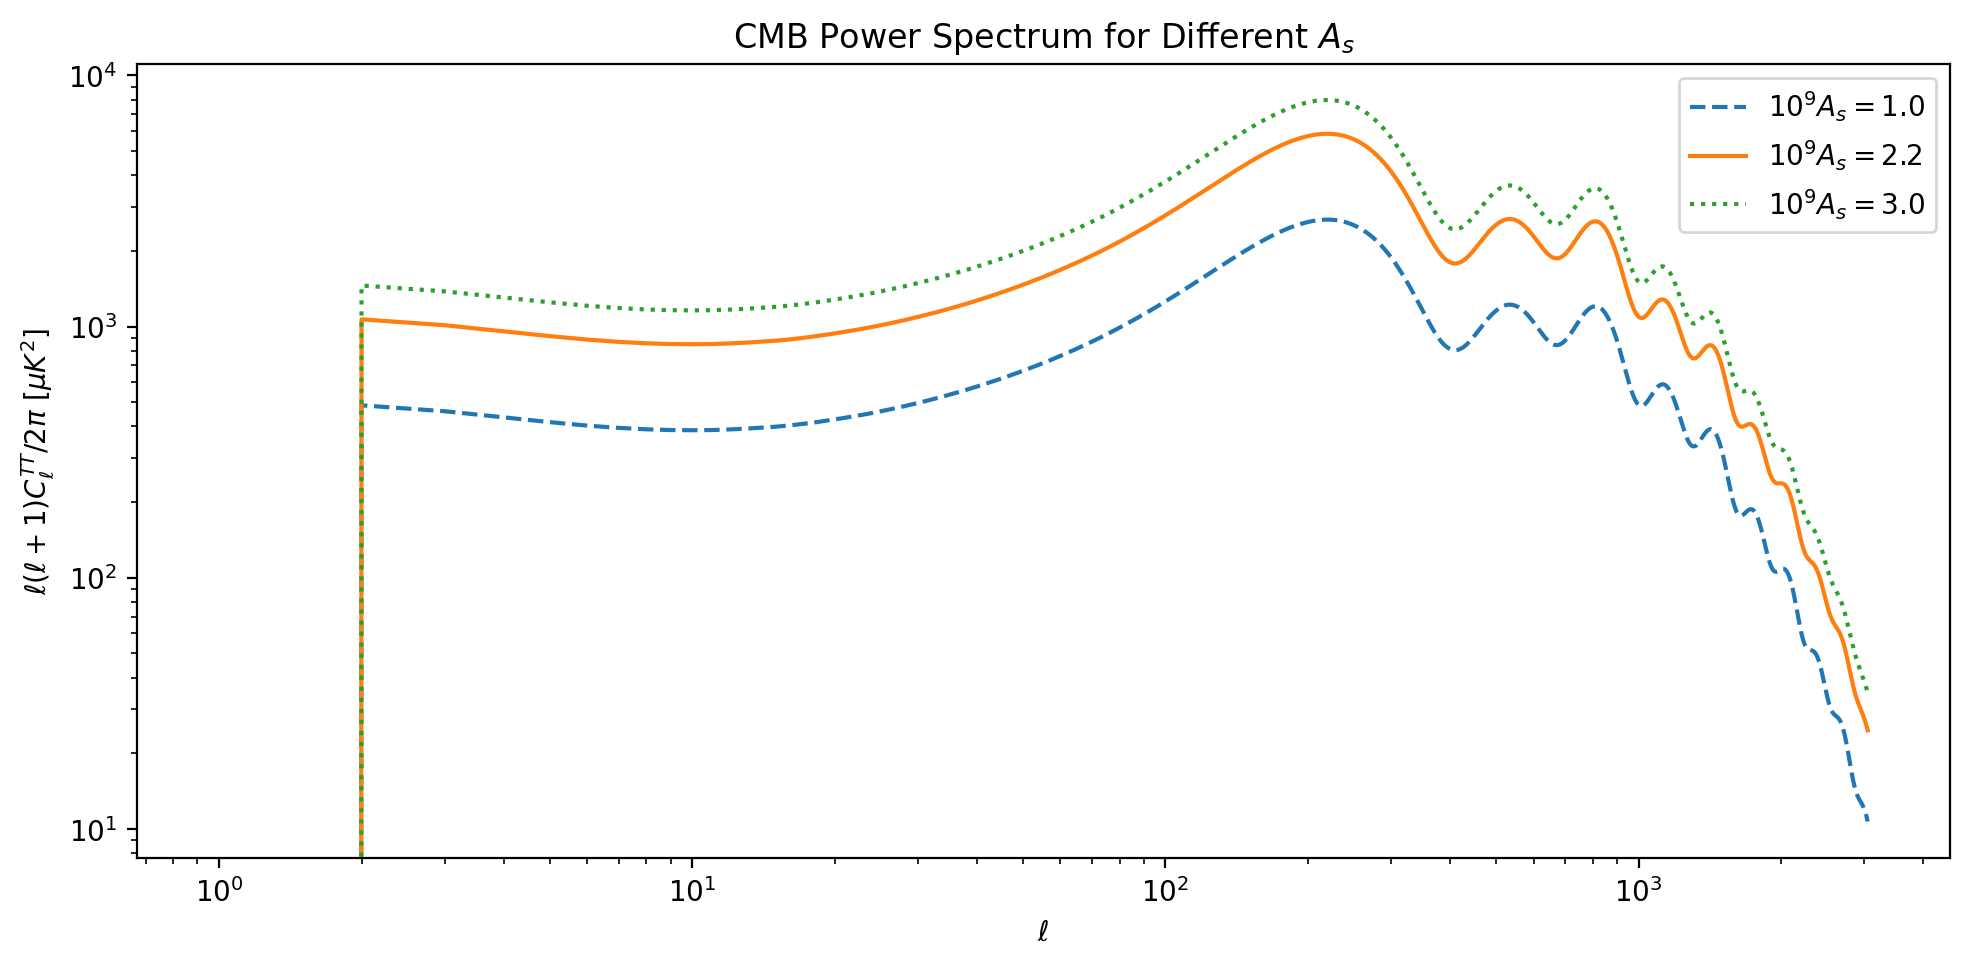

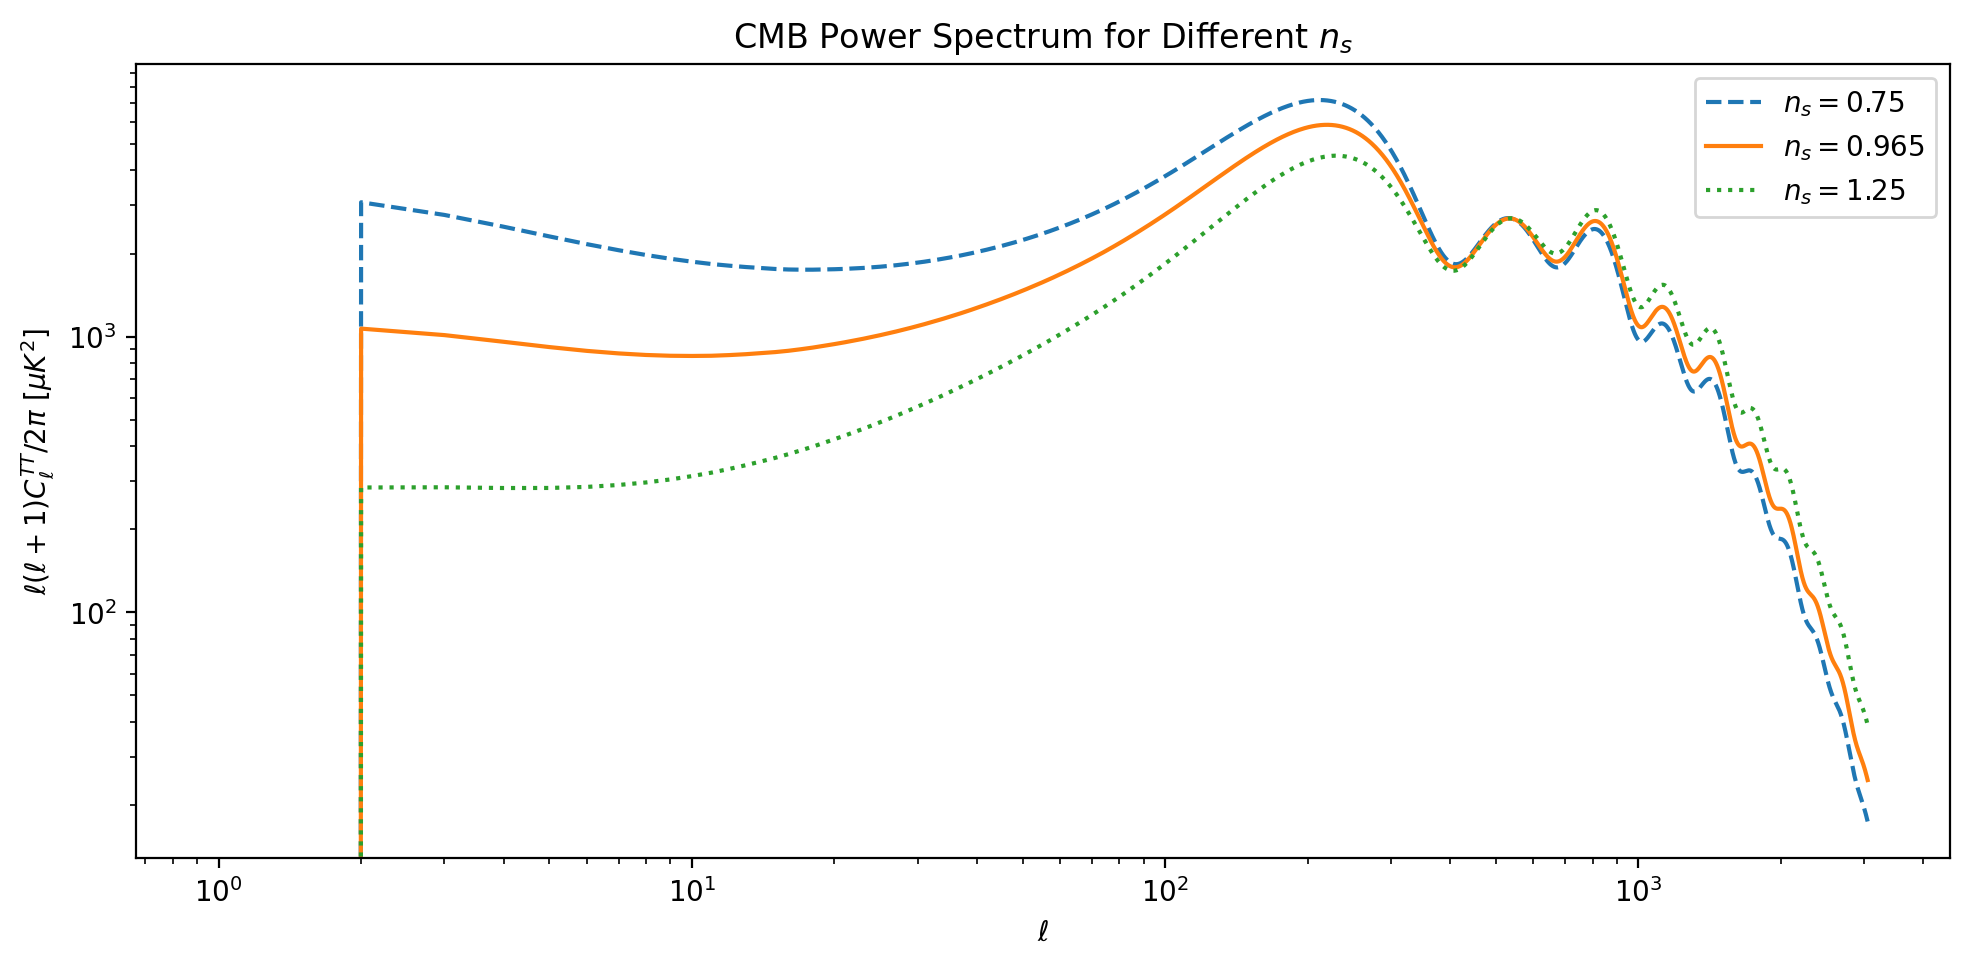

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# ℓ values
# Variations in As
As_vals = [1e-9, 2.2e-9, 3e-9]
As_styles = ['--', '-', ':']

# Prepare plot for varying As
plt.figure(figsize=(10, 5))
for As, style in zip(As_vals, As_styles):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06)
    pars.InitPower.set_params(As=As, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl = powers['total'][:, 0]
    
    ells = np.arange(np.size(cl))

    #Dl = ells * (ells + 1) * cl[2:] / (2 * np.pi)
    plt.plot(ells, cl, style, label=fr'$10^9 A_s = {As*1e9:.1f}$')

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$")
plt.title("CMB Power Spectrum for Different $A_s$")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig("As_varied_TT")
plt.tight_layout()
plt.show()

# Variations in ns
ns_vals = [0.75, 0.965, 1.25]
ns_styles = ['--', '-', ':']

# Prepare plot for varying ns
plt.figure(figsize=(10, 5))
for ns, style in zip(ns_vals, ns_styles):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06)
    pars.InitPower.set_params(As=2.2e-9, ns=ns)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl = powers['total'][:, 0]
    #Dl = ells * (ells + 1) * cl[2:] / (2 * np.pi)
    plt.plot(ells, cl, style, label=fr'$n_s = {ns}$')

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$")
plt.title("CMB Power Spectrum for Different $n_s$")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("ns_vatied_TT")
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# ℓ values
# Variations in As
tau_vals = [0.005, 0.054, 0.100]
tau_styles = ['--', '-', ':']

# Prepare plot for varying As
plt.figure(figsize=(10, 5))
for As, style in zip(As_vals, As_styles):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, As=2e-9, ns=0.06)
    pars.InitPower.set_params(As=As, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl = powers['total'][:, 0]
    
    ells = np.arange(np.size(cl))

    #Dl = ells * (ells + 1) * cl[2:] / (2 * np.pi)
    plt.plot(ells, cl, style, label=fr'$10^9 A_s = {As*1e9:.1f}$')

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$")
plt.title("CMB Power Spectrum for Different $tau$")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig("Tau_varied_TT")
plt.tight_layout()
plt.show()

# Variations in ns
tau_vals = [0.75, 0.965, 1.25]
As_vals = [(2e-9)*np.exp(-2*0.06)/np.exp(-2*0.75), (2e-9)*np.exp(-2*0.06)/np.exp(-2*0.965),  (2e-9)*np.exp(-2*0.06)/np.exp(-2*1.25)]
ns_styles = ['--', '-', ':']

# Prepare plot for varying ns
plt.figure(figsize=(10, 5))
for ns, style in zip(ns_vals, ns_styles):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, ns = 0.06 )
    pars.InitPower.set_params(As=2.2e-9, ns=ns)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl = powers['total'][:, 0]
    #Dl = ells * (ells + 1) * cl[2:] / (2 * np.pi)
    plt.plot(ells, cl, style, label=fr'$n_s = {ns}$')

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$")
plt.title("CMB Power Spectrum for Different $A_s$,Tau such that $A_s exp(-2\tau) $ is constant")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("As_Tau_both_varied")
plt.show()


TypeError: set_cosmology() got an unexpected keyword argument 'As'

<Figure size 1000x500 with 0 Axes>

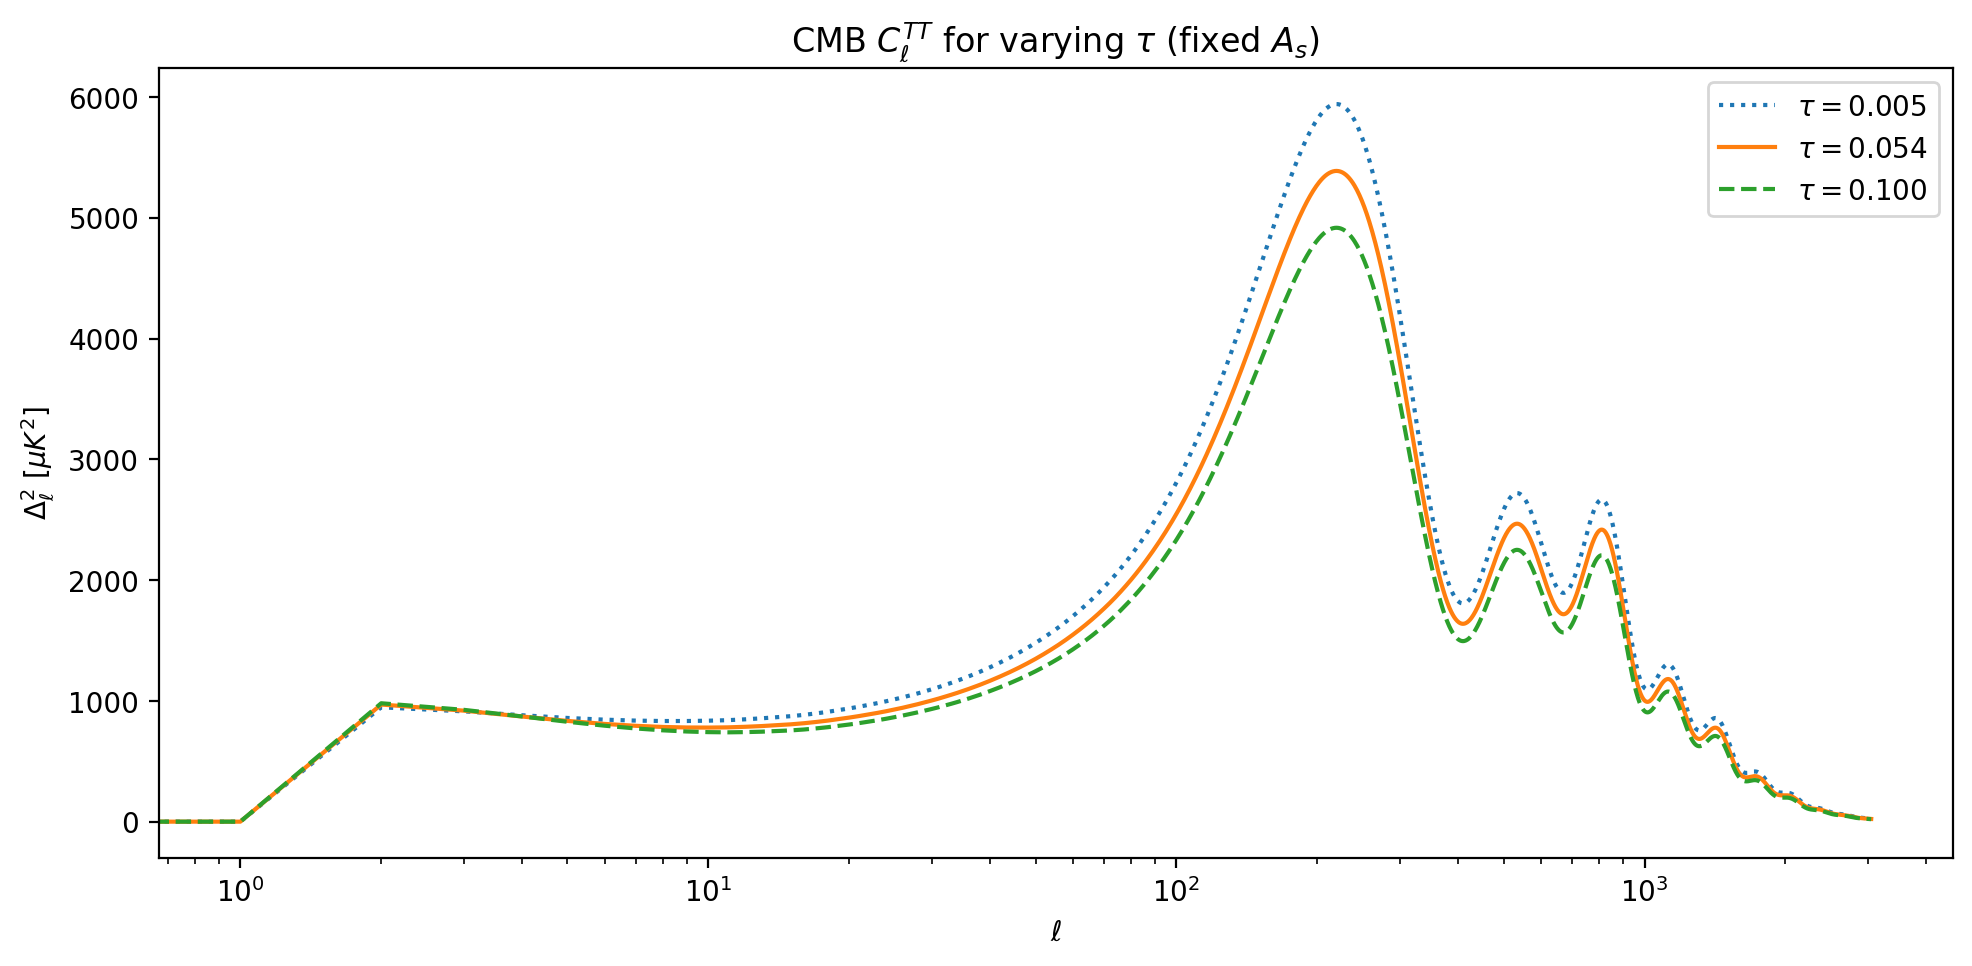

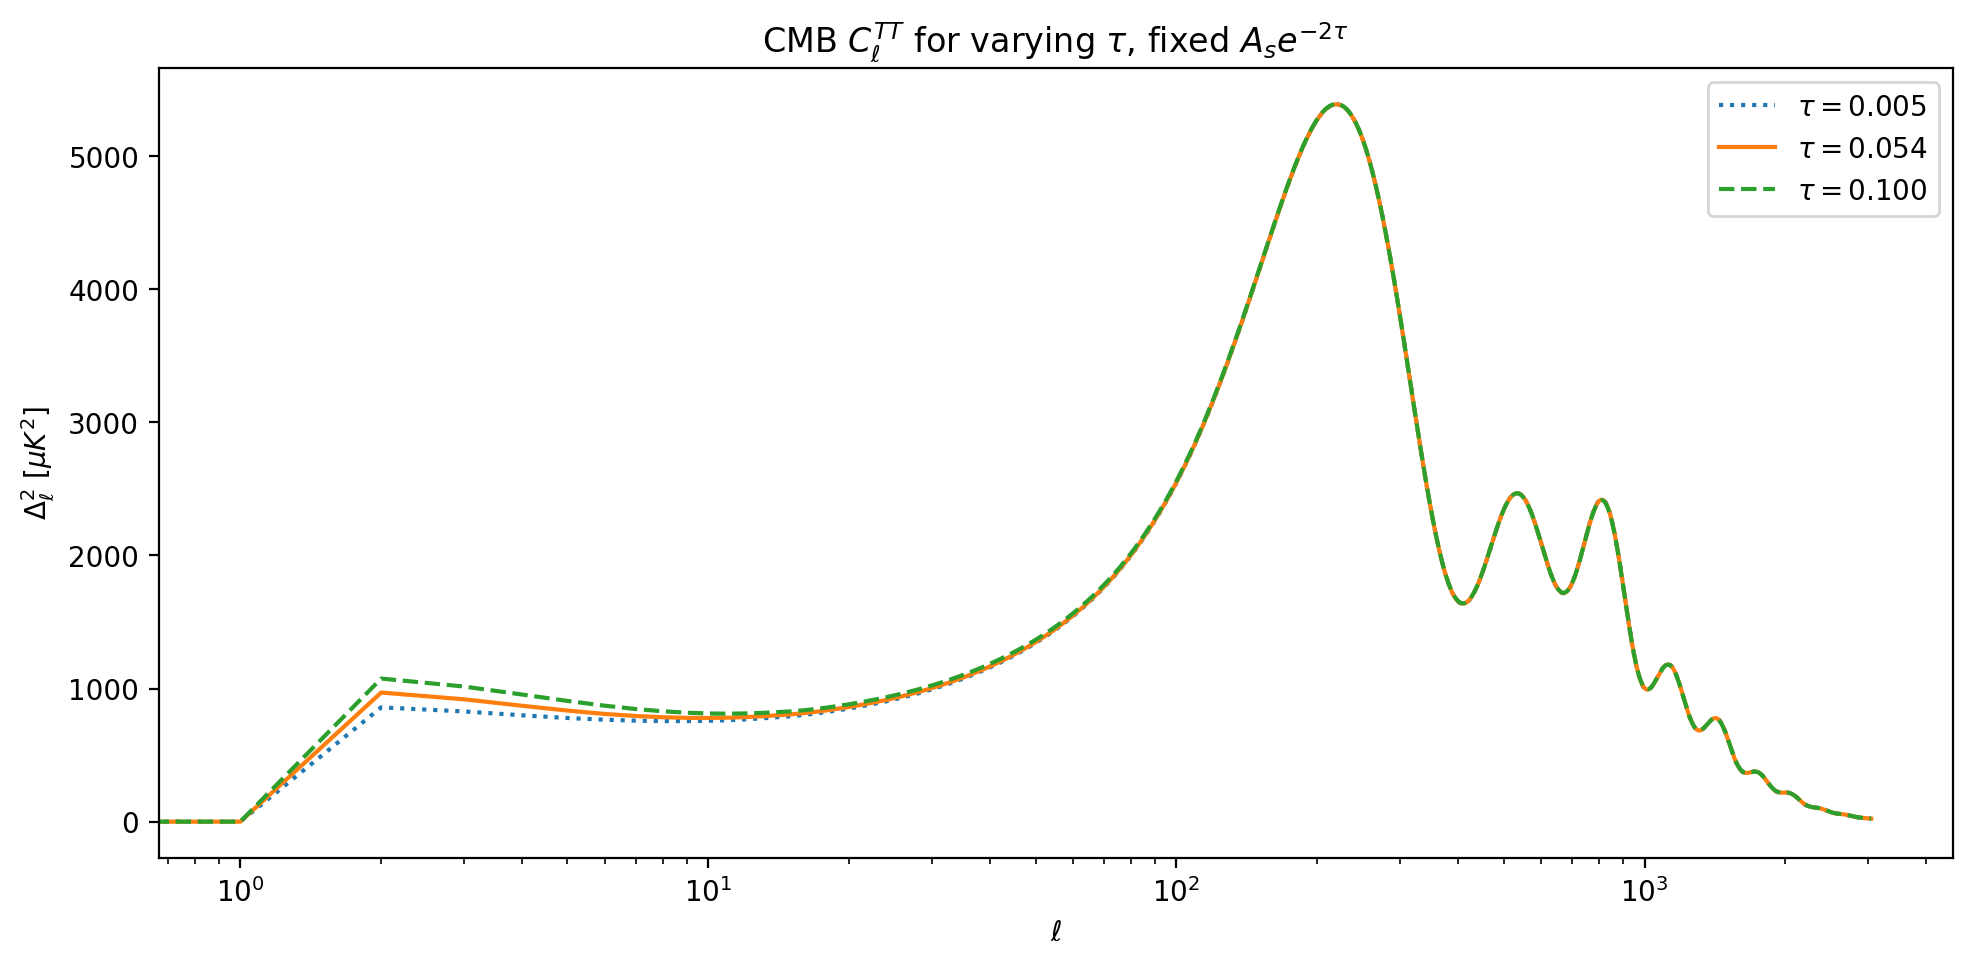

In [15]:
plt.figure(figsize=(10, 5))
tau_vals = [0.005, 0.054, 0.100]
tau_styles = [':', '-', '--']

for tau, style in zip(tau_vals, tau_styles):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=tau)
    pars.InitPower.set_params(As=2e-9, ns=0.965)  # fixed As
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl = powers['total'][:, 0]
    ells = np.arange(cl.shape[0])
    #Dl = ells * (ells + 1) * cl / (2 * np.pi)
    plt.semilogx(ells, cl, style, label=fr"$\tau = {tau:.3f}$")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\Delta_\ell^2\ [\mu K^2]$")
plt.title(r"CMB $C_\ell^{TT}$ for varying $\tau$ (fixed $A_s$)")
plt.legend()
plt.tight_layout()
plt.savefig("fig7_20_left_tau_fixed_As.png")
plt.show()

plt.figure(figsize=(10, 5))
for tau, style in zip(tau_vals, tau_styles):
    As = 2e-9 * np.exp(2 * tau-2*0.054)  # scale As to keep Ae^{-2τ} fixed
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=tau)
    pars.InitPower.set_params(As=As, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl = powers['total'][:, 0]
    ells = np.arange(cl.shape[0])
    #Dl = ells * (ells + 1) * cl / (2 * np.pi)
    plt.semilogx(ells, cl, style, label=fr"$\tau = {tau:.3f}$")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$\Delta_\ell^2\ [\mu K^2]$")
plt.title(r"CMB $C_\ell^{TT}$ for varying $\tau$, fixed $A_s e^{-2\tau}$")
plt.legend()
plt.tight_layout()
plt.savefig("fig7_20_right_tau_scaled_As.png")
plt.show()


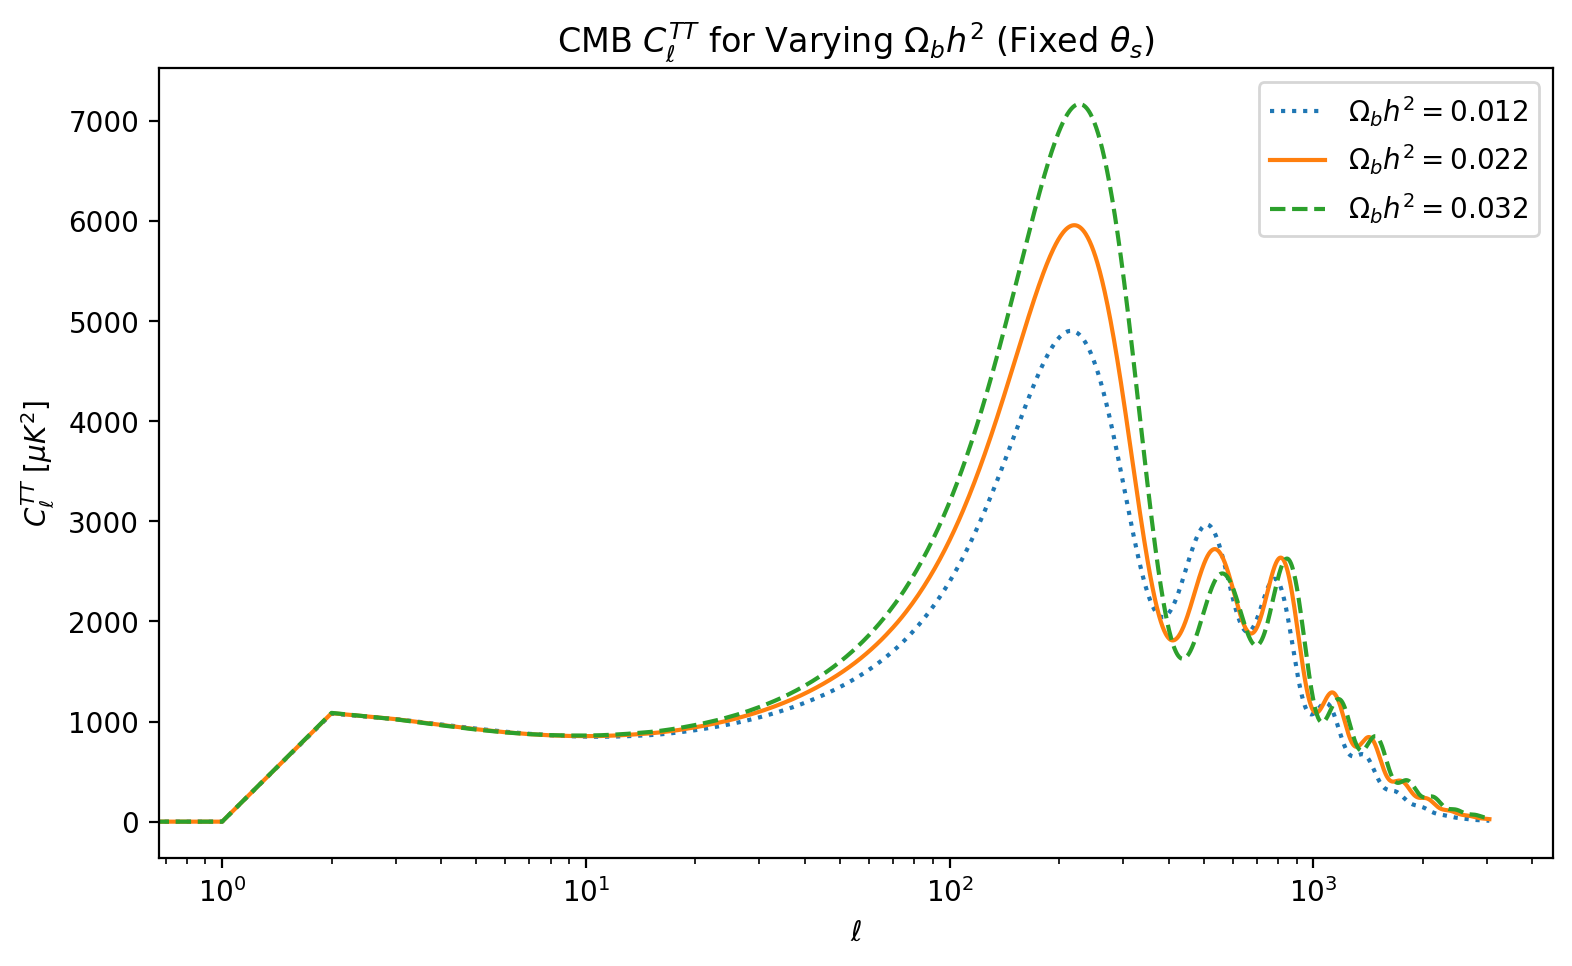

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import camb

# Values of baryon density to vary
ombh2_vals = [0.012, 0.022, 0.032]
styles = [':', '-', '--']

plt.figure(figsize=(8, 5))
for ombh2, style in zip(ombh2_vals, styles):
    pars = camb.CAMBparams()
    # Fix omch2 such that omm = omb + omc stays roughly constant (~0.14)
    pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=0.14 - ombh2, tau=0.06)
    pars.InitPower.set_params(As=2.2e-9, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl_tt = powers['total'][:, 0]
    ells = np.arange(cl_tt.shape[0])
    plt.plot(ells, cl_tt, style, label=fr"$\Omega_b h^2 = {ombh2:.3f}$")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{TT}$ [$\mu K^2$]")
plt.title(r"CMB $C_\ell^{TT}$ for Varying $\Omega_b h^2$ (Fixed $\theta_s$)")
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("fig7_21_top_omegab.png", dpi=300)
plt.show()


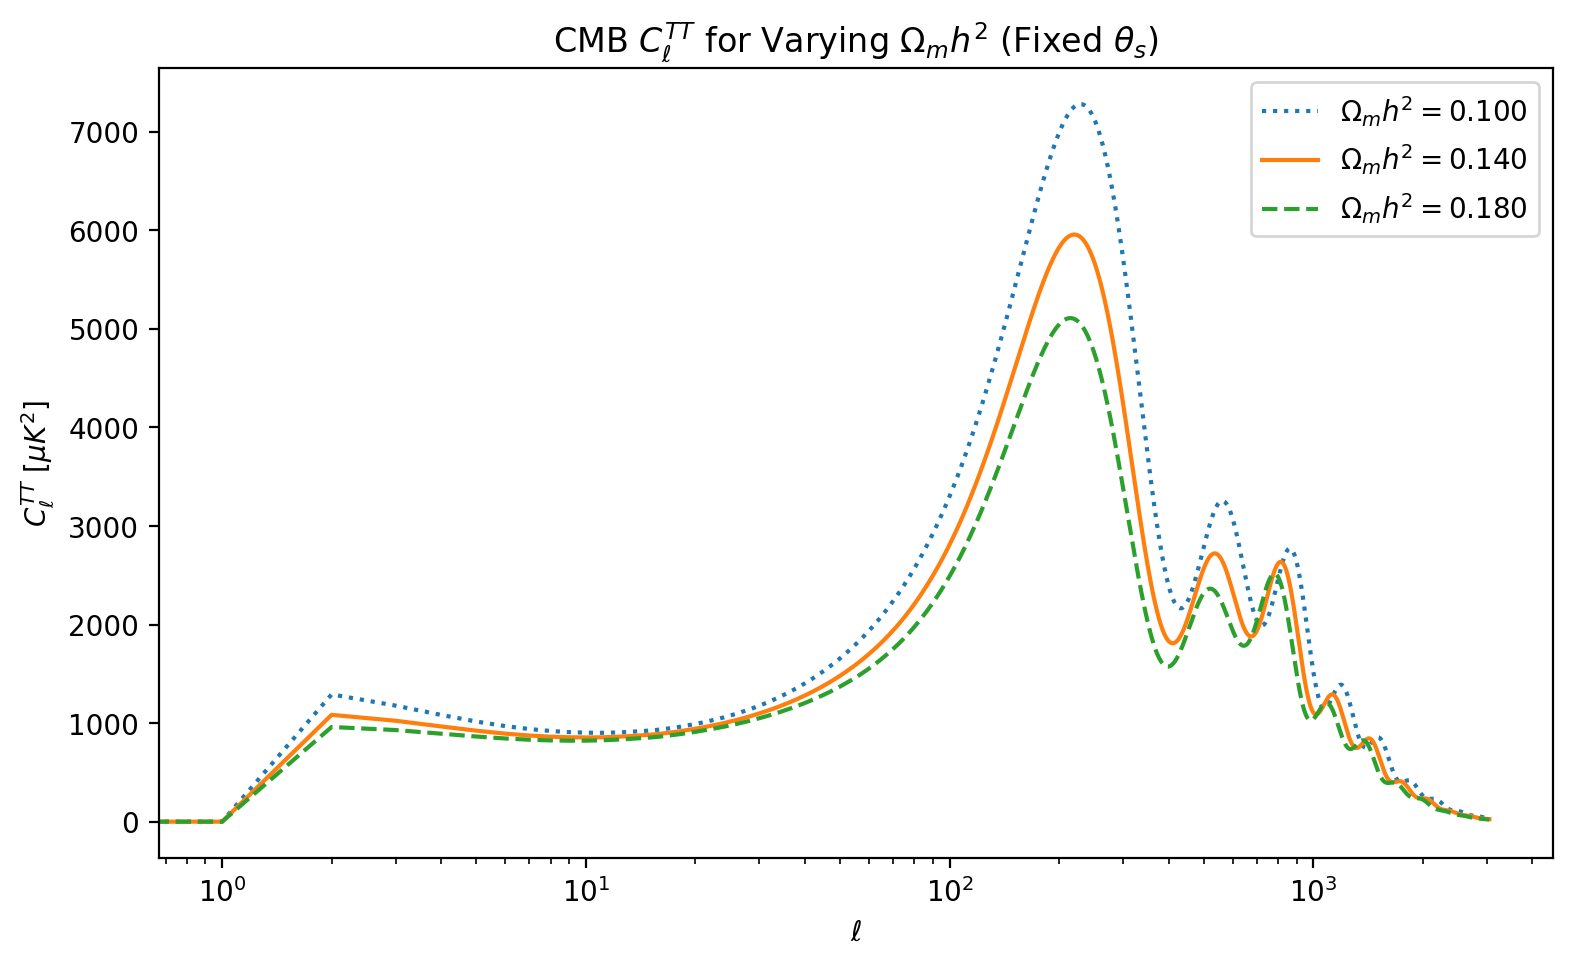

In [17]:
# Values of matter density to vary
ommh2_vals = [0.10, 0.14, 0.18]
styles = [':', '-', '--']

plt.figure(figsize=(8, 5))
for ommh2, style in zip(ommh2_vals, styles):
    # Fix ombh2 = 0.022; vary omch2 to get desired ommh2
    ombh2 = 0.022
    omch2 = ommh2 - ombh2
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, tau=0.06)
    pars.InitPower.set_params(As=2.2e-9, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl_tt = powers['total'][:, 0]
    ells = np.arange(cl_tt.shape[0])
    plt.plot(ells, cl_tt, style, label=fr"$\Omega_m h^2 = {ommh2:.3f}$")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{TT}$ [$\mu K^2$]")
plt.title(r"CMB $C_\ell^{TT}$ for Varying $\Omega_m h^2$ (Fixed $\theta_s$)")
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("fig7_21_bottom_omegam.png", dpi=300)
plt.show()


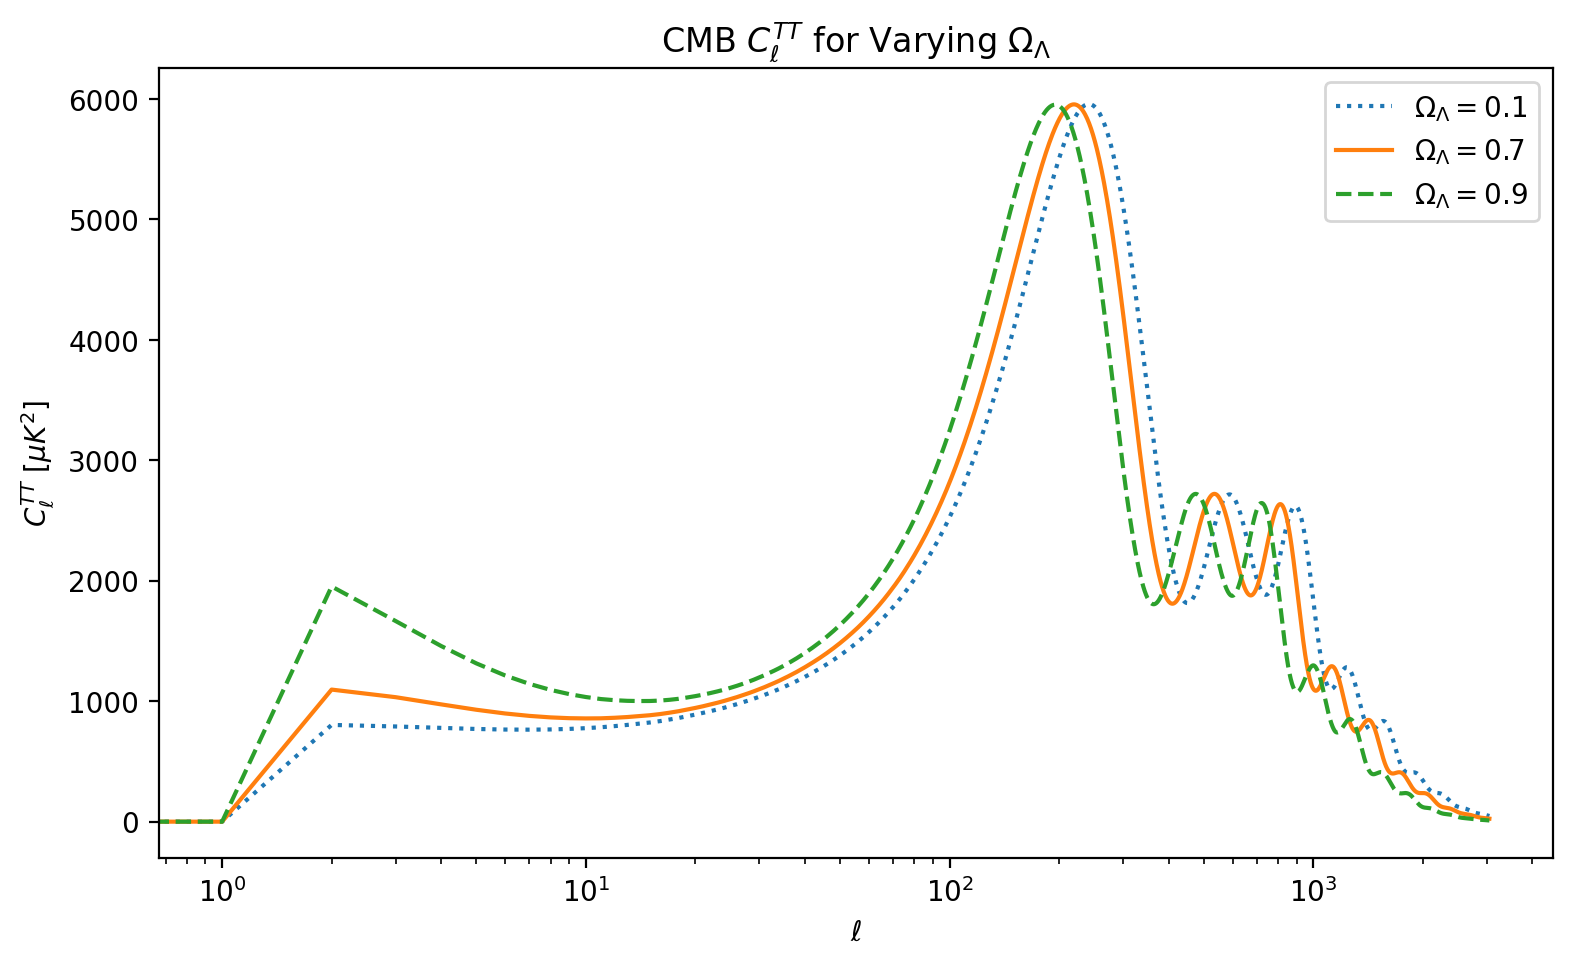

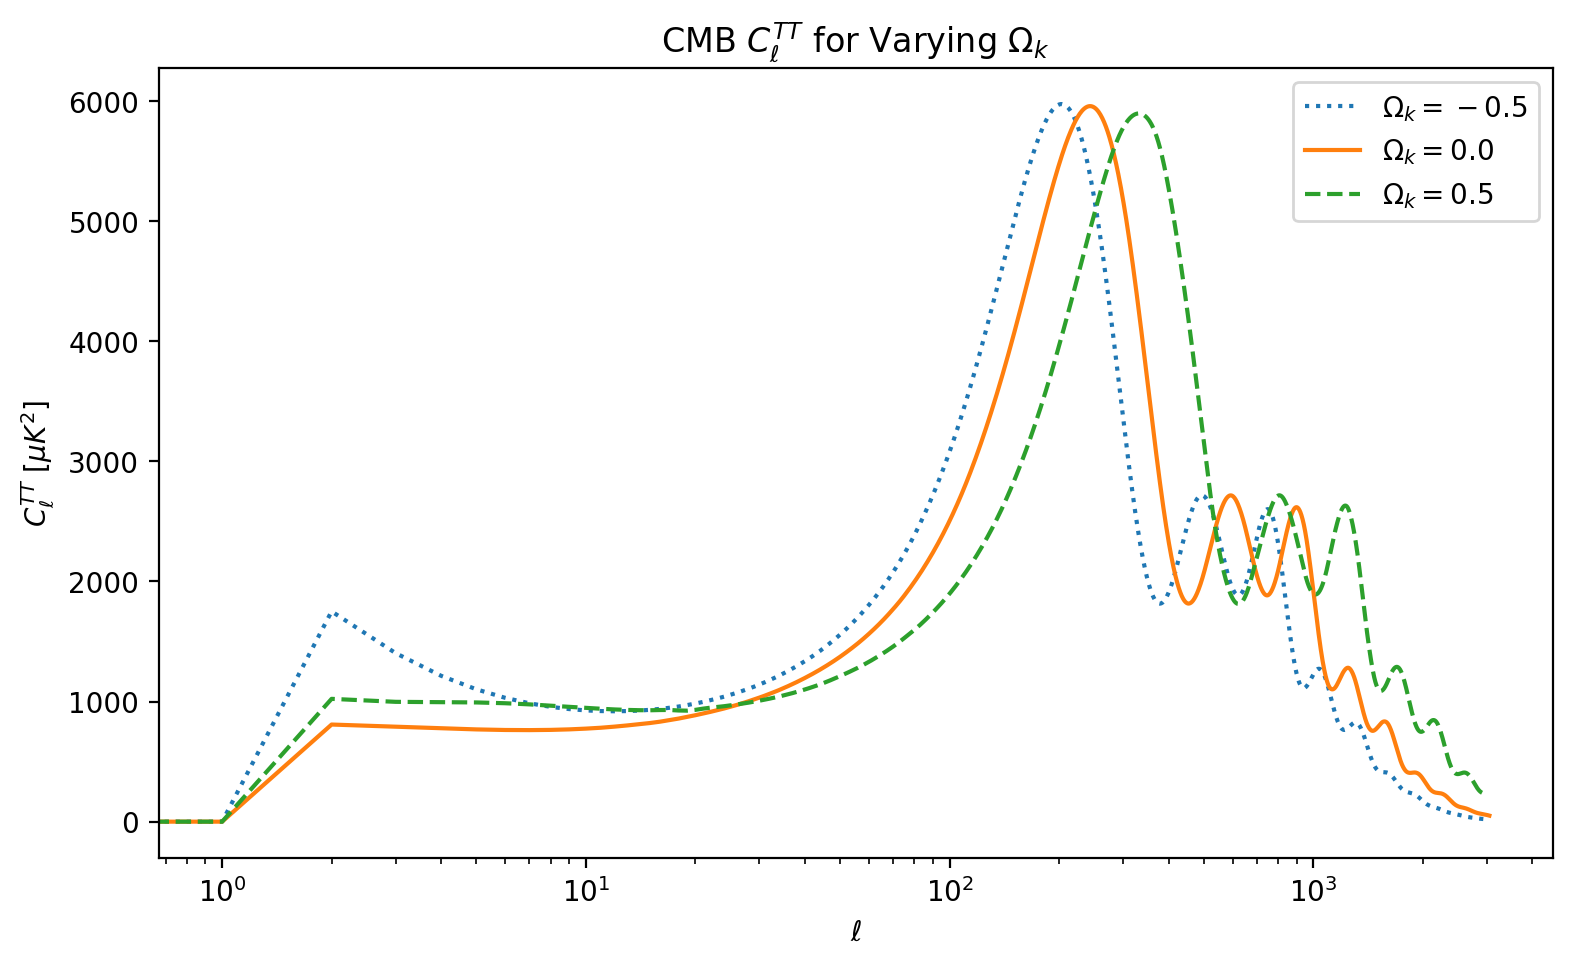

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import camb

# === Fig. 7.22 ===
# Top panel: Vary \Omega_\Lambda, fix \Omega_b h^2 and \Omega_m h^2
omega_b = 0.022
omega_m = 0.14
omegalam_vals = [0.1, 0.7, 0.9]
omlam_styles = [':', '-', '--']

plt.figure(figsize=(8, 5))
for omlam, style in zip(omegalam_vals, omlam_styles):
    # Derive H0 to match given \Omega_m h^2 and \Omega_\Lambda
    h2 = omega_m / (1 - omlam)
    H0 = 100 * np.sqrt(h2)
    omch2 = omega_m - omega_b

    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_b, omch2=omch2, omk=1 - omega_m/h2 - omlam, tau=0.06)
    pars.InitPower.set_params(As=2.2e-9, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl_tt = powers['total'][:, 0]
    ells = np.arange(cl_tt.shape[0])
    plt.plot(ells, cl_tt, style, label=fr"$\Omega_\Lambda = {omlam}$")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{TT}$ [$\mu K^2$]")
plt.title("CMB $C_\ell^{TT}$ for Varying $\Omega_\Lambda$")
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("fig7_22_top_omegalam.png", dpi=300)
plt.show()

# Bottom panel: Vary \Omega_k (curvature), keeping \Omega_m h^2 fixed
omega_b = 0.022
omega_m = 0.14
omegak_vals = [-0.5, 0.0, 0.5]
k_styles = [':', '-', '--']

plt.figure(figsize=(8, 5))
for omk, style in zip(omegak_vals, k_styles):
    h2 = omega_m / (1 - omk)
    H0 = 100 * np.sqrt(h2)
    omch2 = omega_m - omega_b
    omlam = 1 - omega_m/h2 - omk

    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=omega_b, omch2=omch2, omk=omk, tau=0.06)
    pars.InitPower.set_params(As=2.2e-9, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cl_tt = powers['total'][:, 0]
    ells = np.arange(cl_tt.shape[0])
    plt.plot(ells, cl_tt, style, label=fr"$\Omega_k = {omk:.1f}$")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{TT}$ [$\mu K^2$]")
plt.title("CMB $C_\ell^{TT}$ for Varying $\Omega_k$")
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("fig7_22_bottom_omegak.png", dpi=300)
plt.show()
